In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.
'C:\Users\Hai' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
pip install -U matplotlib

Note: you may need to restart the kernel to use updated packages.
'C:\Users\Hai' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.
'C:\Users\Hai' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.
'C:\Users\Hai' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import pandas as pd
import numpy as np

In [6]:
dataset = pd.read_csv("zoo.csv")

In [7]:
duplicates = dataset.duplicated(['animal_name']).sum()
duplicates = dataset.animal_name.value_counts()
frog = dataset.loc[dataset["animal_name"]=="frog"]
dataset["animal_name"][(dataset.venomous == 1) & (dataset.animal_name == "frog")] = "venomous_frog"

<ipython-input-7-0e18c042d2ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["animal_name"][(dataset.venomous == 1) & (dataset.animal_name == "frog")] = "venomous_frog"


In [8]:
feature = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed',
                 'backbone','breathes','venomous','fins','legs','tail','domestic']
X = dataset[feature]
y = dataset['class_type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [10]:
model.score(X_test, y_test)

0.9607843137254902

In [11]:
y_predicted = model.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[21,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  5]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

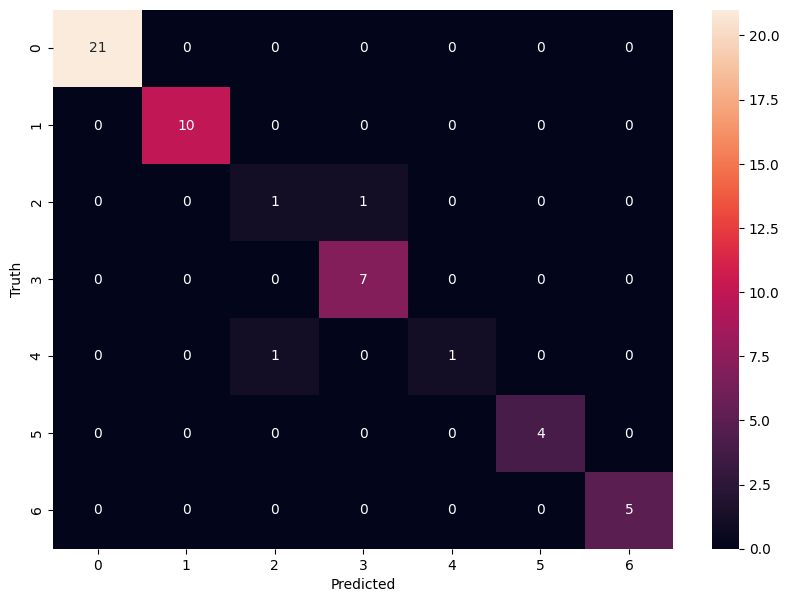

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Best Score =  0.9803921568627451
Best n_estimators =  50


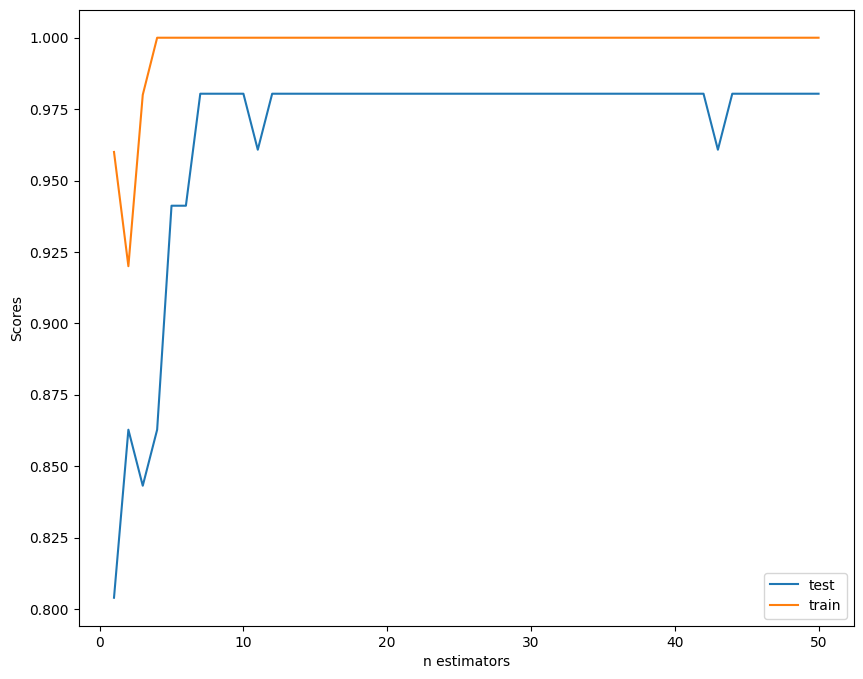

In [14]:
s_max = 0
rf_train_score_list = []
rf_test_score_list = []
for i in range(1,X_train.shape[0]+1):
    rf = RandomForestClassifier(n_estimators = i,random_state = 42)
    rf.fit(X_train,y_train)
    test_score = rf.score(X_test,y_test)
    rf_test_score_list.append(test_score)
    train_score = rf.score(X_train,y_train)
    rf_train_score_list.append(train_score)
    if test_score >= s_max :
        s_max = test_score
        index = i

print("Best Score = ",s_max)
print("Best n_estimators = ",index)

plt.figure(figsize = (10,8))
plt.plot(range(1,X_train.shape[0]+1),rf_test_score_list,label = "test")
plt.plot(range(1,X_train.shape[0]+1),rf_train_score_list,label = "train")
plt.legend()
plt.xlabel("n estimators")
plt.ylabel("Scores")
plt.show()